# Rice grain Analysis Using Deep Convolutional Neural Network
In this Notebook we will see the implementation of the paper named **Rice Purity Analysis using Deep learning**. Our task was to take a scanned image of rice grains like this and convert it to like this to this.  

<img src="https://github.com/Mushahid2521/Rice-Grain-Purity-Analysis-Using-Deep-Learning/blob/master/images/Test15.jpg?raw=1" alt="Image" height="600" width="400" align="left"/> 
<img src="https://github.com/Mushahid2521/Rice-Grain-Purity-Analysis-Using-Deep-Learning/blob/master/images/predicted_img.jpg?raw=1" alt="Image" height="600" width="400" align="right"/>



## Step 1: Dataset Preparation
First of all we need to detect the Individual Rice grains. We can do this by Canny edge detection algorithm. Then we store these individual grains from the Scanned images for training.
Code below this takes the Dataset directory containing Scanned grains with corresponding grain type name as Folder name and create another directory containing trainable individual grain dataset after some processing steps. The steps are: 

1.   Apply Edge detection to full image
2.  Find the Contours of the edges to detect individual grains
3.  Create a mask to extract the grains and making the background completely black
4.  Crop the grains using  opencv ```boundingRect()``` function.
5.  Pad the cropped images to specific size (to retain aspect ratio)
6.  Save the padded images to definite directory.







In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import imutils
import os
import numpy as np
import pading_the_grain



def prepare():

    PATH = '/content/drive/MyDrive/RiceData'
    
    NEW_PATH = 'TRAINABLE_DATASET'
    os.makedirs(NEW_PATH)


    for type in os.listdir(PATH):
        TYPE_PATH = os.path.join(PATH,type)

        print("Processing type {}".format(type))
        
        if type in os.listdir(NEW_PATH):
          continue 

        NEW_TYPE_PATH = os.path.join(NEW_PATH,type)
        os.makedirs(NEW_TYPE_PATH)

        i = 1

        for image in os.listdir(TYPE_PATH):
            IMAGE_PATH = os.path.join(TYPE_PATH,image)

            print("Processing Image....{}".format(image))

            img = cv2.imread(IMAGE_PATH)
            img_grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

            canny_img = cv2.Canny(img_grey, 100, 100)


            cnts = cv2.findContours(canny_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            cnts = imutils.grab_contours(cnts)

            mask = np.ones(img.shape[:2], dtype="uint8") * 255
            cv2.drawContours(mask, cnts, -1, 0, -1)
            img[mask == 255] = 0
            print('number of grain in the image',len(cnts))
            for c in cnts:
                (x, y, w, h) = cv2.boundingRect(c)
                # Take only the right grains, in many cases it might remove the broken grains
                print('weight:',w*h)
                if (w*h >1600):

                    crop = img[y:y + h, x:x + w]
                    try:
                        crop = pading_the_grain.pad_image(crop, 128, 0)
                    except:
                        continue

                    # remove the images with edges only by counting the non zero pixel values
                    if ((49152 - len(crop[crop == 0])) < 2000):
                        continue

                    image_name = "{}_{}.png".format(type,i)
                    image_url = os.path.join(NEW_TYPE_PATH,image_name)

                    cv2.imwrite(image_url, crop)

                    i += 1

                   

        print(f'Got type {type}', len(os.listdir(NEW_TYPE_PATH)))


prepare()

Streaming output truncated to the last 5000 lines.
weight: 390
weight: 2
weight: 6
weight: 44
weight: 1
weight: 68
weight: 45
weight: 164
weight: 4
weight: 432
weight: 1
weight: 20
weight: 20
weight: 462
weight: 20
weight: 770
weight: 6
weight: 84
weight: 621
weight: 266
weight: 1
weight: 1
weight: 475
weight: 1
weight: 52
weight: 30
weight: 640
weight: 620
weight: 140
weight: 196
weight: 286
weight: 840
weight: 504
weight: 110
weight: 24
weight: 816
weight: 20
weight: 36
weight: 39
weight: 2
weight: 168
weight: 88
weight: 496
weight: 1
weight: 585
weight: 200
weight: 63
weight: 2
weight: 279
weight: 36
weight: 638
weight: 546
weight: 1
weight: 648
weight: 646
weight: 20
weight: 288
weight: 330
weight: 594
weight: 504
weight: 7
weight: 170
weight: 336
weight: 133
weight: 15
weight: 480
weight: 310
weight: 161
weight: 160
weight: 407
weight: 49
weight: 550
weight: 544
weight: 12
weight: 216
weight: 1
weight: 10
weight: 14
weight: 20
weight: 4
weight: 4
weight: 75
weight: 45
weight: 187


## Step 2: Data Augmentation
The dataset contains different number of scanned images for different grain types. So we increase the amount of data and balance the data by rotating a single grains to different orientations. 

In [ ]:
# Path containing individual grain dataset
PATH = 'TRAINABLE_DATASET'

# Directory to save the new dataset after augmentation 
NEW_DATA_PATH = 'ENLARGED_TRAINABLE_DATASET'
#os.makedirs(NEW_DATA_PATH)

# Total number of grains we want to make for each grain type
TOTAL_GRAINS = 20000

for grain_type in os.listdir(PATH):
  p = os.path.join(PATH, grain_type)
  
  print(f'Working with {grain_type}')
  grains = os.listdir(p)
  length = len(grains)
  print(length)
  idx = 0
  
  if length>TOTAL_GRAINS:
    NEW_TYPE_PATH = os.path.join(NEW_DATA_PATH,grain_type)
    
    os.makedirs(NEW_TYPE_PATH)
    for gr in grains:
      gp = os.path.join(p, gr)
      img = cv2.imread(gp)
      (h,w) = img.shape[:2]
      centre = (w//2, h//2)
      
      img_name = "{}_{}.png".format(grain_type, idx)
      img_url = os.path.join(NEW_TYPE_PATH, img_name)
      idx+=1
      
      cv2.imwrite(img_url, img)
    continue
  
  more_needed = TOTAL_GRAINS-length
  if length != 0:
    ratio = int(abs(more_needed/length))
    
    NEW_TYPE_PATH = os.path.join(NEW_DATA_PATH,grain_type)
    os.makedirs(NEW_TYPE_PATH)
    
        
    idx = 0
    
    for i in range(1,ratio+2):
      for gr in grains:
        gp = os.path.join(p, gr)
        img = cv2.imread(gp)
        (h,w) = img.shape[:2]
        centre = (w//2, h//2)
        
        img_name = "{}_{}.png".format(grain_type, idx)
        img_url = os.path.join(NEW_TYPE_PATH, img_name)
        idx+=1
        if i==1:
          cv2.imwrite(img_url, img)
        
        M = cv2.getRotationMatrix2D(centre, 40*i, 1.0)
        rotated = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
        
        img_name = "{}_{}.png".format(grain_type, idx)
        img_url = os.path.join(NEW_TYPE_PATH, img_name)
        idx+=1
        
        cv2.imwrite(img_url, rotated)

Working with Sharbati
13363
Working with SonaMasoori
4024
Working with 1401
11338
Working with 1509
16144
Working with PARMAL SELLA
0
Working with JEERA RICE
0
Working with Sugandha
9915
Working with 1121
15857
Working with PR-11
37329


## diff first method ##

In [ ]:
from skimage.measure import compare_ssim
import argparse
import imutils
import cv2

imageA = cv2.imread('/content/TRAINABLE_DATASET/1121/1121_1.png')
imageB = cv2.imread('/content/ENLARGED_TRAINABLE_DATASET/PR-11/PR-11_0.png')
# convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

In [ ]:
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.7721461082616766


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  """Entry point for launching an IPython kernel.


## calculate the weight of the first image ##

In [ ]:
img_grey = cv2.cvtColor(imageA, cv2.COLOR_RGB2GRAY)

canny_img = cv2.Canny(img_grey, 100, 100)


cnts = cv2.findContours(canny_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

mask = np.ones(img.shape[:2], dtype="uint8") * 255
cv2.drawContours(mask, cnts, -1, 0, -1)
img[mask == 255] = 0
print('number of grain in the image',len(cnts))
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    print('image A weight : ',w*h)

number of grain in the image 1
image A weight :  4554


## calculate the weight of the second image ##

In [ ]:
img_grey = cv2.cvtColor(imageB, cv2.COLOR_RGB2GRAY)

canny_img = cv2.Canny(img_grey, 100, 100)


cnts = cv2.findContours(canny_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

mask = np.ones(img.shape[:2], dtype="uint8") * 255
cv2.drawContours(mask, cnts, -1, 0, -1)
img[mask == 255] = 0
print('number of grain in the image',len(cnts))
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    print('image B weight : ',w*h)

number of grain in the image 1
image B weight :  3776


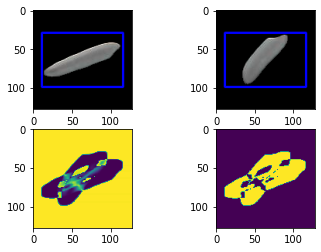

In [ ]:
thresh = cv2.threshold(diff, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# loop over the contours
for c in cnts:
	# compute the bounding box of the contour and then draw the
	# bounding box on both input images to represent where the two
	# images differ
	(x, y, w, h) = cv2.boundingRect(c)
	cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
	cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)
# show the output images
#from google.colab.patches import cv2_imshow
#cv2_imshow( imageA)
#cv2_imshow(imageB)
#cv2_imshow( diff)
#cv2_imshow( thresh)
import matplotlib.pyplot as plt
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(imageA)
axarr[0,1].imshow(imageB)
axarr[1,0].imshow(diff)
axarr[1,1].imshow(thresh)

## second method ##

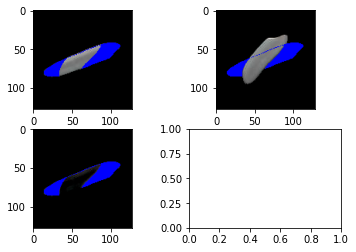

In [ ]:

imageA = cv2.imread('/content/TRAINABLE_DATASET/1121/1121_1.png')
imageB = cv2.imread('/content/ENLARGED_TRAINABLE_DATASET/PR-11/PR-11_0.png')
difference = cv2.subtract(imageA, imageB)

# color the mask red
Conv_hsv_Gray = cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(Conv_hsv_Gray, 0, 255,cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)
difference[mask != 255] = [0, 0, 255]

# add the red mask to the images to make the differences obvious
imageA[mask != 255] = [0, 0, 255]
imageB[mask != 255] = [0, 0, 255]

import matplotlib.pyplot as plt
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(imageA)
axarr[0,1].imshow(imageB)
axarr[1,0].imshow(difference)


Image similarity 0.7721461082616766


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  import sys


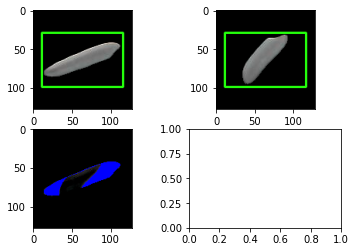

In [ ]:
imageA = cv2.imread('/content/TRAINABLE_DATASET/1121/1121_1.png')
imageB = cv2.imread('/content/ENLARGED_TRAINABLE_DATASET/PR-11/PR-11_0.png')
# convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

(score, diff) = compare_ssim(grayA, grayB, full=True)
print("Image similarity", score)

# The diff image contains the actual image differences between the two images
# and is represented as a floating point data type in the range [0,1] 
# so we must convert the array to 8-bit unsigned integers in the range
# [0,255] before we can use it with OpenCV
diff = (diff * 255).astype("uint8")

# Threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

mask = np.zeros(grayA.shape, dtype='uint8')
filled_imageB = imageB.copy()

for c in contours:
    area = cv2.contourArea(c)
    if area > 40:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(imageA, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(imageB, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.drawContours(mask, [c], 0, (0,255,0), -1)
        cv2.drawContours(filled_imageB, [c], 0, (0,255,0), -1)

import matplotlib.pyplot as plt
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(imageA)
axarr[0,1].imshow(imageB)
axarr[1,0].imshow(difference)


SSIM: 0.7057747323351502
SSIM: 0.7057747323351502


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  


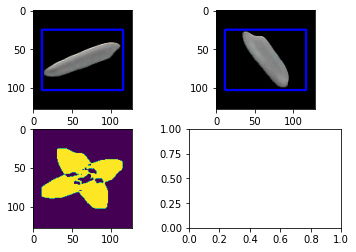

In [ ]:

imageA = cv2.imread('/content/TRAINABLE_DATASET/1121/1121_1.png')
imageB = cv2.imread('/content/ENLARGED_TRAINABLE_DATASET/PR-11/PR-11_0.png')
# convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

thresh = cv2.threshold(diff, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# loop over the contours
for c in cnts:
	# compute the bounding box of the contour and then draw the
	# bounding box on both input images to represent where the two
	# images differ
	(x, y, w, h) = cv2.boundingRect(c)
	cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
	cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)
# show the output images
import matplotlib.pyplot as plt
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(imageA)
axarr[0,1].imshow(imageB)
axarr[1,0].imshow(diff)
axarr[1,0].imshow(thresh)

## Step 3: Prepare the data to feed to the Model

### Encoding the type of the grain

In [ ]:
PATH = '/content/ENLARGED_TRAINABLE_DATASET'
label_encoder = {}
label_decoder = {}
i = 0
for grain_type in os.listdir(PATH):
  

  
  label_encoder[str(grain_type)] = i
  label_decoder[i] = grain_type
  i+=1
  
print(label_encoder)
print(label_decoder)

{'PR-11': 0, 'SonaMasoori': 1, '1509': 2, '1121': 3, 'Sharbati': 4, 'Sugandha': 5, '1401': 6}
{0: 'PR-11', 1: 'SonaMasoori', 2: '1509', 3: '1121', 4: 'Sharbati', 5: 'Sugandha', 6: '1401'}


### Spliting the training and validation data.
We save the paths of the images to pass these to Custom Data Generator

In [ ]:
# Partition to store all the image path location partiton{'train':[], 'validation':[]}
partition = {}
partition['train'] = []
partition['validation'] = []

# Label dict to store the path as key and label index as value
label = {}


for grain_type in os.listdir(PATH):
  #print("Collecting type {} has {} items".format(grain_type, len(os.listdir(PATH+'/'+grain_type))  ))


    
  type_path = os.path.join(PATH,grain_type)
  
  type_list = os.listdir(type_path)
  
  # We shuffle the image lists
  np.random.seed(10)
  
  fixed_type_list = np.random.choice(type_list, size=len(type_list), replace=False)
  
  train_list = fixed_type_list[3000:]
  validation_list = fixed_type_list[:3000]
  
  for item in train_list:
    item_path = os.path.join(type_path, item)
    partition['train'].append(item_path)
    label[item_path] = label_encoder[grain_type] 
    
  for item in validation_list:
    item_path = os.path.join(type_path, item)
    partition['validation'].append(item_path)
    label[item_path] = label_encoder[grain_type]
  
  

In [ ]:

for ty in os.listdir('/content/ENLARGED_TRAINABLE_DATASET'):
  print(len(os.listdir('/content/ENLARGED_TRAINABLE_DATASET/'+ty)))

37329
20120
32288
31714
26726
29745
22676


### Defining the Custom Keras Data Generator
As the size of the Dataset is large. So it is better to use Data Generator to avoid memory issue.
This [post](https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly) helped.

In [ ]:
import numpy as np
import keras
import imutils

no_classes = 7
 
########## Custom Data Generator Class #################

class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=64, dim=(128,128), n_channels=3,
                 n_classes=no_classes, shuffle=False):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find .list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)
            
         
      

    def __data_generation(self,list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, self.dim[0], self.dim[1], self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            try:
              _ = (cv2.imread(ID).shape!=(128,128,3))
            except:
              continue
            try:
              X[i,] = cv2.imread(ID)*(1.0/255.0)
              #X_[i,] = generate_data(ID)
            except:
              continue
                
            # Store class
            y[i] = self.labels[ID]

        return X, keras.utils.to_categorical(y, num_classes=self.n_classes)


### Creating the Custom Data Generator Object

In [ ]:
import numpy as np

from keras.models import Sequential

training_generator = DataGenerator(partition['train'], label)
validation_generator = DataGenerator(partition['validation'], label)


## Step 4:  Defining our Keras Model

In [ ]:
########### Conv Model #############

from keras.layers import *

model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(128,128,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(7, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)       

## Step 5: Training the Model

In [ ]:
from keras.optimizers import Adam
import tensorflow as tf
from keras.callbacks import EarlyStopping
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

earlyStopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='min')





  
history = model.fit_generator(generator=training_generator,
                      epochs = 2,
                      validation_data=validation_generator,
                      
                      )
preds = model.predict_classes(x_test)
cf = confusion_matrix(y_test, preds) 

from mlxtend.plotting import plot_confusion_matrix
...
multiclass = confusion_matrix(y_test,dtree_predictions)
class_names = ['SonaMasoori', 'Sharbati', '1121', '1509', 'Sugandha', '1401', 'PR-11']

fig, ax = plot_confusion_matrix(conf_mat=multiclass, colorbar=True,
show_absolute=False, show_normed=True)
ax.margins(2,2) #just change the values til adjust to your screen.
plt.show()

target_names = label_encoder.keys()
print(classification_report(y_test, preds, target_names=target_names))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/2
  79/2806 [..............................] - ETA: 58:19 - loss: 1.9450 - accuracy: 0.1465

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Step 6: Making Predictions

In [ ]:
def pred(image_path):
  
  k = np.expand_dims(cv2.imread(image_path)*(1.0/255.0), axis=0)
  p = model.predict(k)
  p = np.argmax(p)
  
  return label_decoder[p]


# Approach with Morphological Features
We also tested the result with Morphological Feature and different Machine Leanring Classifier. For this we have collected  Six morphological features. Using the following opencv functions we accomplish this. 

<img src="https://github.com/Mushahid2521/Rice-Grain-Purity-Analysis-Using-Deep-Learning/blob/master/images/ellipse.jpg?raw=1" alt="Drawing;"/>
<img src="https://github.com/Mushahid2521/Rice-Grain-Purity-Analysis-Using-Deep-Learning/blob/master/images/rectangle.jpg?raw=1" alt="Drawing" style="width: 200px;"/>

```fitEllipse()``` gives major axis length (majLen)  and minor axis length (minLen)

```minAreaRect()```  gives length (l) and width (w)

```cv2.contourArea``` gives area (A)

```cv2.arcLength``` gives perimmeter (P)






   
 **Six Features:**
1.   Area by Perimeter Ratio:   ($\frac{A}{P}$)
2.   Ratio to the Area to the total of area and perimeter:  $\frac{A}{(A+P)}$
3.   Aspect Ratio: ($\frac{majLen}{minlen}$)
4.   Retangularity: $\frac{A}{(l*w)}$ 
5.   Equivalent Diameter: $\sqrt{\frac{4A}{\pi}}$
6.   Shape factor 3: $\frac{A}{l*w}$

In [ ]:
import numpy as np
import keras
import imutils
import math
import os

no_classes = 7

def generate_data(ID):

    img = cv2.imread(ID)
    img_grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    canny_img = cv2.Canny(img_grey, 100, 100)
      
    cnts = cv2.findContours(canny_img.copy(),  cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
      
    for c in cnts:
      rect = cv2.minAreaRect(c)
      ((_, _), (p,q), _) = rect
      if(p>=q):
          length = p
          width = q
      else:
          length = q
          width = p

      area = cv2.contourArea(cnts[0])
      perimeter = cv2.arcLength(cnts[0], closed=True)
      
      try:
        (_,_), (majax, minax), _ = cv2.fitEllipse(cnts[0])
        if(ax1>=ax2):
          majax = ax1
          minax = ax2
        else:
          majax = ax2
          minax = ax1
        return [area/perimeter, area/(area+perimeter), maxax/minax, area/(length*width), math.sqrt(4*area/math.pi), area/(majax*minax)]
      
      except:
        # Sometimes the Fit Ellipse function throws error. So we handle it by try catch block
        return [area/perimeter, area/(area+perimeter), length/width, area/(length*width), math.sqrt(4*area/math.pi), area/(length*width)]
        

In [ ]:
x_train = []
y_train = []
x_test = []
y_test = []

PATH = 'ENLARGED_TRAINABLE_DATASET'

for grain_type in os.listdir(PATH):
  
  print(f"Collecting type {grain_type}")
    
  type_path = os.path.join(PATH,grain_type)
  
  type_list = os.listdir(type_path)
 
  np.random.seed(10)
  fixed_type_list = np.random.choice(type_list, size=len(type_list), replace=False)

  i = 0 
  for item in fixed_type_list:
    
    item_path = os.path.join(type_path, item)
    try:
      dat = generate_data(item_path)
      i+=1
    except:
      continue
      
    if(i%1000==0):
      print(i) 
    
    # We keep 3000 for test and rest for training 
    if(i<=3000):
      x_test.append(dat)
      y_test.append(label_encoder[grain_type])
    #print("Done with Validation")
    
    else:
      x_train.append(dat)
      y_train.append(label_encoder[grain_type])
      


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
1

### KNN Classifier:

In [ ]:
k_range = np.arange(3, 19, 2)
param_grid = dict(n_neighbors=k_range)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
grid.best_params_

{'n_neighbors': 17}

0.5251904761904762
              precision    recall  f1-score   support

       PR-11       0.58      0.82      0.68      3000
 SonaMasoori       0.88      0.94      0.91      3000
        1509       0.45      0.45      0.45      3000
        1121       0.38      0.34      0.36      3000
    Sharbati       0.50      0.60      0.55      3000
    Sugandha       0.35      0.33      0.34      3000
        1401       0.39      0.20      0.26      3000

    accuracy                           0.53     21000
   macro avg       0.51      0.53      0.51     21000
weighted avg       0.51      0.53      0.51     21000



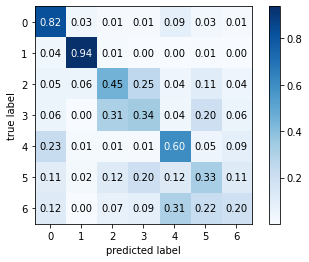

In [ ]:
# training a KNN classifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors = 17).fit(x_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(x_test, y_test) 
print(accuracy) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(x_test)  
cm = confusion_matrix(y_test, knn_predictions) 
target_names = label_encoder.keys()
class_names = ['SonaMasoori', 'Sharbati', '1121', '1509', 'Sugandha', '1401', 'PR-11']
print(classification_report(y_test, knn_predictions, target_names=target_names))
from mlxtend.plotting import plot_confusion_matrix
...
multiclass = confusion_matrix(y_test,knn_predictions)


fig, ax = plot_confusion_matrix(conf_mat=multiclass, colorbar=True,
show_absolute=False, show_normed=True)
ax.margins(2,2) #just change the values til adjust to your screen.
plt.show()

In [ ]:
from sklearn.model_selection import validation_curve
param_range = np.arange(3, 19, 2)
train_scores, valid_scores = validation_curve(KNeighborsClassifier(), x_train, y_train,param_name="n_neighbors",param_range=param_range,
    scoring="accuracy", n_jobs=1)

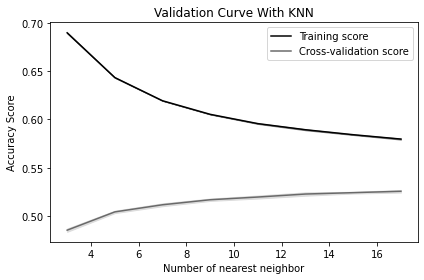

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With KNN")
plt.xlabel("Number of nearest neighbor")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
param_grid = {'min_samples_split' : range(10,80,20),'max_depth': range(1,10,2)}

In [ ]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
tree.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 10, 2),
                    

In [ ]:
tree.best_params_

{'max_depth': 9, 'min_samples_split': 30}

In [ ]:
# training a DescisionTreeClassifier 
from sklearn.metrics import confusion_matrix, classification_report
dtree_model = DecisionTreeClassifier(max_depth= 9,min_samples_split=30).fit(x_train, y_train) 
dtree_predictions = dtree_model.predict(x_test) 

# accuracy on X_test
acc = dtree_model.score(x_test, y_test)
print(f"Accuracy: {acc}")


# creating a confusion matrix
print('Classification Report')
target_names = label_encoder.keys()
print(classification_report(y_test, dtree_predictions, target_names=target_names))

Accuracy: 0.5411428571428571
Classification Report
              precision    recall  f1-score   support

       PR-11       0.60      0.81      0.69      3000
 SonaMasoori       0.91      0.91      0.91      3000
        1509       0.49      0.46      0.47      3000
        1121       0.43      0.32      0.37      3000
    Sharbati       0.51      0.66      0.57      3000
    Sugandha       0.35      0.39      0.37      3000
        1401       0.43      0.23      0.30      3000

    accuracy                           0.54     21000
   macro avg       0.53      0.54      0.53     21000
weighted avg       0.53      0.54      0.53     21000



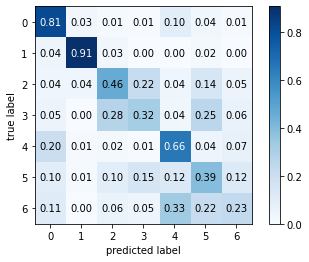

In [ ]:
cf = confusion_matrix(y_test,dtree_predictions)
from mlxtend.plotting import plot_confusion_matrix
...
multiclass = confusion_matrix(y_test,dtree_predictions)
class_names = ['SonaMasoori', 'Sharbati', '1121', '1509', 'Sugandha', '1401', 'PR-11']

fig, ax = plot_confusion_matrix(conf_mat=multiclass, colorbar=True,
show_absolute=False, show_normed=True)
ax.margins(2,2) #just change the values til adjust to your screen.
plt.show()


In [ ]:
from sklearn.model_selection import validation_curve
param_range = np.arange(3, 10)
train_scores, valid_scores = validation_curve(DecisionTreeClassifier(), x_train, y_train,param_name="max_depth",param_range=param_range,
    scoring="accuracy", n_jobs=1)

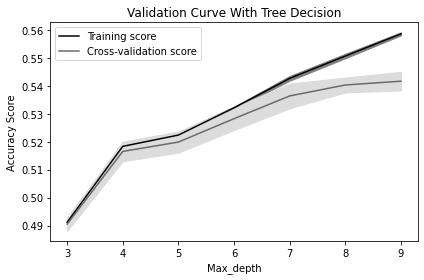

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Tree Decision")
plt.xlabel("Max_depth")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

## Naive Bayes ##

In [ ]:
from sklearn.naive_bayes import GaussianNB

gb = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=gb, 
                 param_grid=params_NB, 
                 ) 

In [ ]:
gs_NB.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=GaussianNB(priors=None, var_smoothing=1e-09),
             iid='deprecated', n_jobs=None,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02,...
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
gs_NB.best_params_

{'var_smoothing': 0.0008111308307896872}

In [ ]:
gs_model = GaussianNB(var_smoothing= 0.0008111308307896872)
gs_model.fit(x_train,y_train)
gs_predictions = gs_model.predict(x_test) 

# accuracy on X_test
acc = gs_model.score(x_test, y_test)
print(f"Accuracy: {acc}")


# creating a confusion matrix
print('Classification Report')
target_names = label_encoder.keys()
print(classification_report(y_test, gs_predictions, target_names=target_names))

Accuracy: 0.44285714285714284
Classification Report
              precision    recall  f1-score   support

       PR-11       0.49      0.85      0.63      3000
 SonaMasoori       0.78      0.79      0.79      3000
        1509       0.44      0.04      0.08      3000
        1121       0.28      0.87      0.42      3000
    Sharbati       0.52      0.54      0.53      3000
    Sugandha       0.00      0.00      0.00      3000
        1401       0.21      0.00      0.01      3000

    accuracy                           0.44     21000
   macro avg       0.39      0.44      0.35     21000
weighted avg       0.39      0.44      0.35     21000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


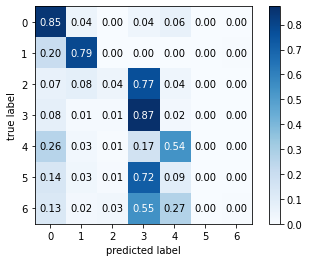

In [ ]:
cf = confusion_matrix(y_test,gs_predictions)
from mlxtend.plotting import plot_confusion_matrix
...
multiclass = confusion_matrix(y_test,gs_predictions)
class_names = ['SonaMasoori', 'Sharbati', '1121', '1509', 'Sugandha', '1401', 'PR-11']

fig, ax = plot_confusion_matrix(conf_mat=multiclass, colorbar=True,
show_absolute=False, show_normed=True)
ax.margins(2,2) #just change the values til adjust to your screen.
plt.show()


In [ ]:
from sklearn.model_selection import validation_curve
param_range = np.logspace(0,-9, num=100)
train_scores, valid_scores = validation_curve(GaussianNB(), x_train, y_train,param_name='var_smoothing',param_range=param_range,
    scoring="accuracy", n_jobs=1)

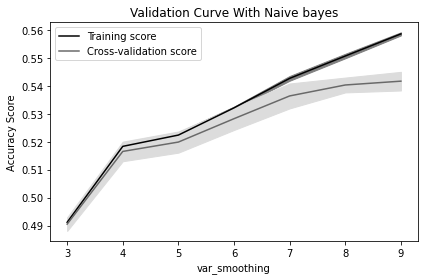

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With Naive bayes")
plt.xlabel("var_smoothing")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

## Neural Network

In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)

Epoch 1/20
2648/2648 [==============================] - 5s 2ms/step - loss: 1.6110 - accuracy: 0.3497 - val_loss: 1.2014 - val_accuracy: 0.5149
Epoch 2/20
2648/2648 [==============================] - 5s 2ms/step - loss: 1.2153 - accuracy: 0.5078 - val_loss: 1.1846 - val_accuracy: 0.5277
Epoch 3/20
2648/2648 [==============================] - 5s 2ms/step - loss: 1.1855 - accuracy: 0.5153 - val_loss: 1.1581 - val_accuracy: 0.5315
Epoch 4/20
2648/2648 [==============================] - 5s 2ms/step - loss: 1.1760 - accuracy: 0.5183 - val_loss: 1.2004 - val_accuracy: 0.5071
Epoch 5/20
2648/2648 [==============================] - 5s 2ms/step - loss: 1.1664 - accuracy: 0.5214 - val_loss: 1.1596 - val_accuracy: 0.5271
Epoch 6/20
2648/2648 [==============================] - 5s 2ms/step - loss: 1.1571 - accuracy: 0.5235 - val_loss: 1.1568 - val_accuracy: 0.5230
Epoch 7/20
2648/2648 [==============================] - 5s 2ms/step - loss: 1.1564 - accuracy: 0.5240 - val_loss: 1.1191 - val_accuracy:

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


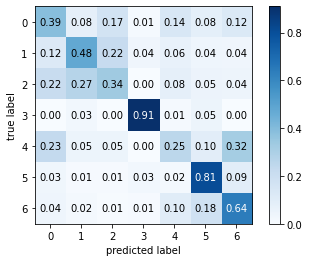

              precision    recall  f1-score   support

    Sugandha       0.36      0.41      0.38      3000
        1509       0.51      0.46      0.48      3000
        1121       0.40      0.34      0.37      3000
 SonaMasoori       0.92      0.93      0.92      3000
        1401       0.42      0.22      0.29      3000
       PR-11       0.62      0.82      0.71      3000
    Sharbati       0.52      0.63      0.57      3000

    accuracy                           0.55     21000
   macro avg       0.53      0.55      0.53     21000
weighted avg       0.53      0.55      0.53     21000



In [ ]:
from keras.layers import Dense, Input
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

model = Sequential()
model.add(Dense(140, input_shape=(6,), activation='relu'))
model.add(Dense(140, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

y_tr = to_categorical(y_train)
history = model.fit(x_train, y_tr, epochs=20, batch_size=64, validation_data=(x_test,to_categorical(y_test)))


preds = model.predict_classes(x_test)
cf = confusion_matrix(y_test, preds) 

from mlxtend.plotting import plot_confusion_matrix
...
multiclass = confusion_matrix(y_test,dtree_predictions)
class_names = ['SonaMasoori', 'Sharbati', '1121', '1509', 'Sugandha', '1401', 'PR-11']

fig, ax = plot_confusion_matrix(conf_mat=multiclass, colorbar=True,
show_absolute=False, show_normed=True)
ax.margins(2,2) #just change the values til adjust to your screen.
plt.show()

target_names = label_encoder.keys()
print(classification_report(y_test, preds, target_names=target_names))

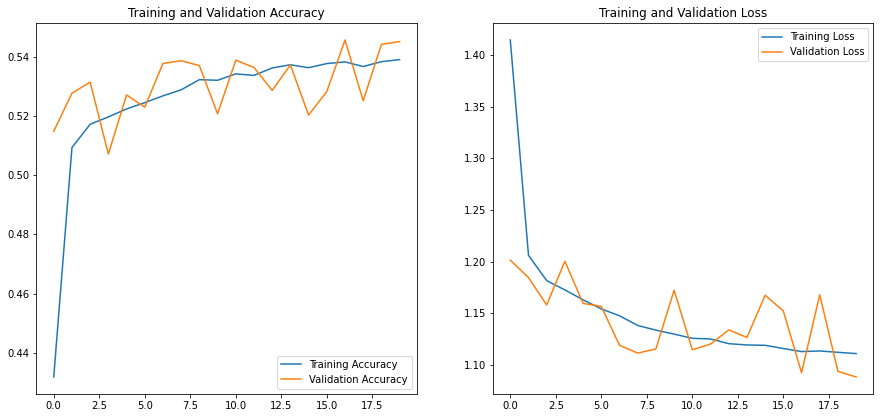

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


## use the model to predict on image ##

In [ ]:
i = 0
IMAGE_PATH = '/content/drive/MyDrive/RiceData/1121/B175_1.jpg'
img = cv2.imread(IMAGE_PATH)
img_grey = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

canny_img = cv2.Canny(img_grey, 100, 100)


cnts = cv2.findContours(canny_img.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

mask = np.ones(img.shape[:2], dtype="uint8") * 255
cv2.drawContours(mask, cnts, -1, 0, -1)
img[mask == 255] = 0

for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    # Take only the right grains, in many cases it might remove the broken grains
    if (w*h >1600):
        crop = img[y:y + h, x:x + w]
        try:
            crop = pading_the_grain.pad_image(crop, 128, 0)
        except:
            continue

        # remove the images with edges only by counting the non zero pixel values
        if ((49152 - len(crop[crop == 0])) < 2000):
            continue

        image_name = "{}_{}.png".format(type,i)
        image_url = os.path.join('/content/Test',image_name)

        cv2.imwrite(image_url, crop)

        i += 1


In [ ]:
i

135

In [ ]:
input = []
indice_input = []
i=0
for pth in os.listdir('/content/Test'):
  img_path = os.path.join('/content/Test',pth)
  try:
    dat = generate_data(img_path)
    input.append(dat)
    i+=1
  except:
    indice_input.append(i)
    i+=1
    continue

##Predict using Knn##

In [ ]:
pred = knn.predict(input)

In [ ]:
pred

array([2, 4, 4, 4, 2, 4, 3, 2, 2, 3, 4, 3, 4, 2, 2, 2, 2, 3, 2, 2, 2, 3,
       3, 2, 2, 3, 3, 3, 4, 3, 5, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 4, 2,
       6, 3, 2, 2, 4, 5, 2, 4, 4, 2, 4, 2, 3, 3, 4, 2, 2, 4, 2, 4, 2, 3,
       2, 2, 3, 2, 3, 4, 4, 2, 3, 2, 2, 4, 6, 2, 6, 3, 4, 4])

In [ ]:
def most_common(lst):
    return max(set(lst), key=lst.count)

most_common(list(pred)) , label_decoder[most_common(list(pred))]

(2, '1121')

weights:
 [4930, 5772, 2376, 5695, 4278, 3680, 6188, 2725, 2889, 6370, 4747, 5428, 3959, 6014, 4182, 4914, 4488, 3630, 6160, 5183, 5040, 4675, 3161, 2616, 4692, 5544, 4050, 3040, 5568, 5785, 2750, 4059, 2080, 4554, 3737, 5092, 2350, 5304, 3016, 5310, 3458, 4465, 5150, 2600, 5130, 3030, 4920, 5742, 6300, 4424, 4896, 6624, 2457, 3772, 3724, 6132, 4992, 5460, 4284, 4399, 4940, 5768, 2675, 5576, 5487, 5456, 6468, 6042, 5184, 4900, 4242, 5643, 5005, 5520, 3854, 4100, 5676, 5264, 4753, 4982, 2619, 4410, 4900, 5100, 4128, 3604, 3162, 3492, 4462, 3600, 6164, 4042, 6162, 4700, 31563] 


nb grain in the image: 95 




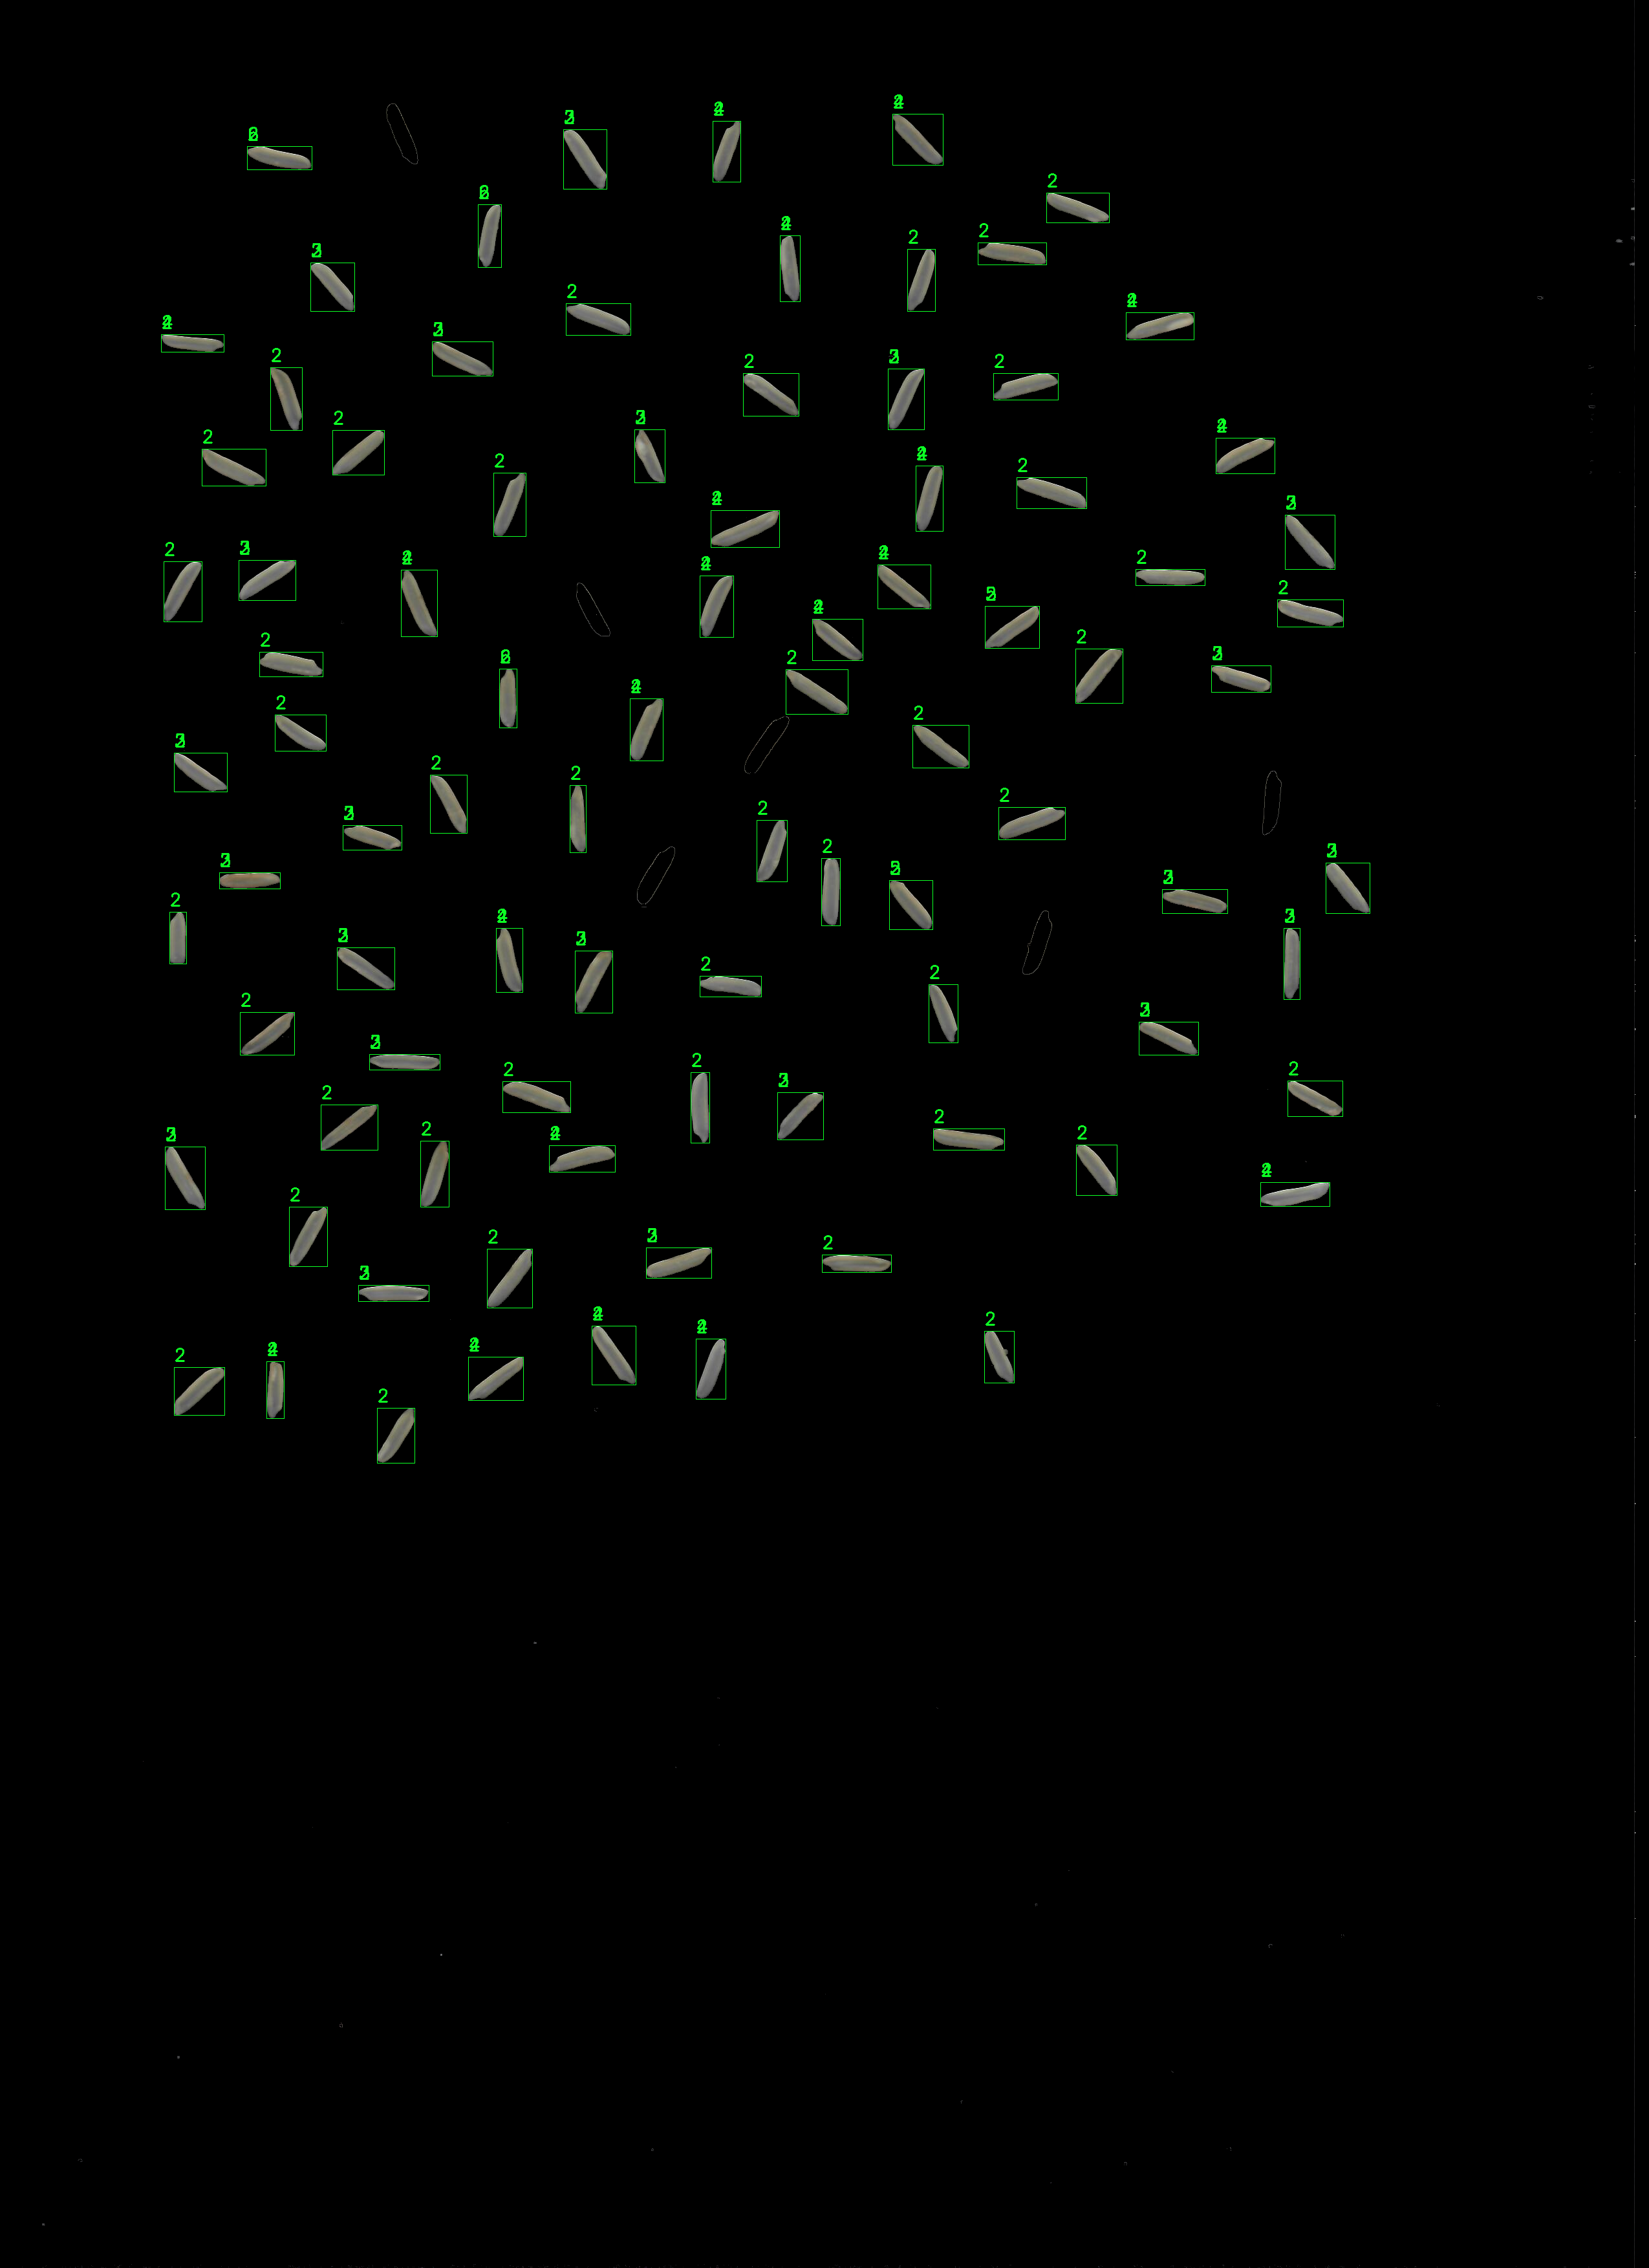


weights:
 [4930, 5772, 2376, 5695, 4278, 3680, 6188, 2725, 2889, 6370, 4747, 5428, 3959, 6014, 4182, 4914, 4488, 3630, 6160, 5183, 5040, 4675, 3161, 2616, 4692, 5544, 4050, 3040, 5568, 5785, 2750, 4059, 2080, 4554, 3737, 5092, 2350, 5304, 3016, 5310, 3458, 4465, 5150, 2600, 5130, 3030, 4920, 5742, 6300, 4424, 4896, 6624, 2457, 3772, 3724, 6132, 4992, 5460, 4284, 4399, 4940, 5768, 2675, 5576, 5487, 5456, 6468, 6042, 5184, 4900, 4242, 5643, 5005, 5520, 3854, 4100, 5676, 5264, 4753, 4982, 2619, 4410, 4900, 5100, 4128, 3604, 3162, 3492, 4462, 3600, 6164, 4042, 6162, 4700, 31563] 


nb grain in the image: 95 




In [ ]:
i=0
j=0

val = most_common(list(pred))
cmpt = 0
weight = []
for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    # Take only the right grains, in many cases it might remove the broken grains
    if (w*h >1600):
        cmpt+=1
        weight.append(w*h)
        crop = img[y:y + h, x:x + w]
        try:
            crop = pading_the_grain.pad_image(crop, 128, 0)
        except:
            continue

        if ((49152 - len(crop[crop == 0])) < 2000):
            continue
        
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (36,255,12), 1)
        cv2.putText(img, str(val), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
     
          

       
from google.colab.patches import cv2_imshow
print('weights:\n',weight,'\n\n')
print('nb grain in the image:',cmpt,'\n\n')
cv2_imshow(img)
print('\nweights:\n',weight,'\n\n')
print('nb grain in the image:',cmpt,'\n\n')


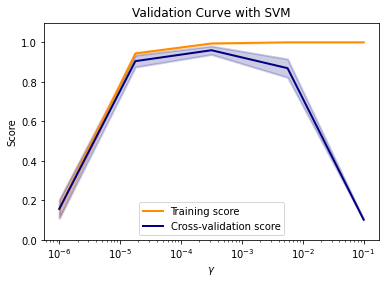

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

X, y = load_digits(return_X_y=True)

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()